In [1]:
example_1 = """.....
.S-7.
.|.|.
.L-J.
....."""

example_2 = """..F7.
.FJ|.
SJ.L7
|F--J
LJ..."""

In [2]:
with open("./data/Day 10/input.txt") as f:
    data = f.read()

In [8]:
import numpy as np

In [22]:
def parse_input(input_str: str) -> np.array:
    return np.array([list(row) for row in input_str.splitlines()])

In [65]:
def get_monster_start(maze: np.array) -> tuple[int, int]:
    indexes = np.where(maze == "S")
    return (indexes[0][0], indexes[1][0])

In [113]:
def check_connected_pipe(maze: np.array, previous: tuple[int, int], new: tuple[int, int]) -> bool:
    diff_y = new[0] - previous[0]
    diff_x = new[1] - previous[1]
    if (maze[new] == '.'):
        return False
    elif (maze[new] == "|" or maze[new] == "L" or maze[new] =="J") and diff_y == 1:
        return True
    elif (maze[new] == "|" or maze[new] == "F" or maze[new] =="7") and diff_y == -1:
        return True
    elif (maze[new] == "-" or maze[new] == "J" or maze[new] =="7") and diff_x == 1:
        return True
    elif (maze[new] == "-" or maze[new] == "F" or maze[new] =="L") and diff_x == -1:
        return True
    elif (maze[new] == "S"):
        return True
    else:
        return False

In [114]:
def get_next_position(maze: np.array, previous: tuple[int, int], current: tuple[int, int]) -> tuple[int, int]:
    diff_y = current[0] - previous[0]
    diff_x = current[1] - previous[1]
    if (maze[current] == "|") and diff_y == 1:
        return (current[0]+1, current[1])
    elif (maze[current] == "|") and diff_y == -1:
        return (current[0]-1, current[1])
    elif (maze[current] == "-") and diff_x == 1:
        return (current[0], current[1]+1)
    elif (maze[current] == "-") and diff_x == -1:
        return (current[0], current[1]-1)
    elif (maze[current] == "L") and diff_y == 1:
        return (current[0], current[1]+1)
    elif (maze[current] == "L") and diff_x == -1:
        return (current[0]-1, current[1])
    elif (maze[current] == "J") and diff_y == 1:
        return (current[0], current[1]-1)
    elif (maze[current] == "J") and diff_x == 1:
        return (current[0]-1, current[1])
    elif (maze[current] == "7") and diff_y == -1:
        return (current[0], current[1]-1)
    elif (maze[current] == "7") and diff_x == 1:
        return (current[0]+1, current[1])
    elif (maze[current] == "F") and diff_y == -1:
        return (current[0], current[1]+1)
    elif (maze[current] == "F") and diff_x == -1:
        return (current[0]+1, current[1])
    elif (maze[current] == "S"):
        return (current[0], current[1])
    else:
        print("Error")

In [115]:
def track_pipe_network(maze: np.array, start_index: tuple[int]):
    current_index = start_index
    indexes_to_check = [(current_index[0] - 1, current_index[1]), (current_index[0] + 1, current_index[1]), (current_index[0], current_index[1] -1), (current_index[0], current_index[1]+1)]
    for current_index in indexes_to_check:
        pipe_network = list()
        prev_index = start_index
        steps = 0
        while check_connected_pipe(maze, prev_index, current_index) and start_index not in pipe_network:
            pipe_network.append(current_index)
            temp_cur_index = current_index
            current_index = get_next_position(maze, prev_index, current_index)
            prev_index = temp_cur_index
            steps += 1
        if start_index in pipe_network:
            pipe_network.append(start_index)
            break
    return round(steps/2), pipe_network

# Part 1

In [118]:
example_1_maze = parse_input(example_1)
example_1_start = get_monster_start(example_1_maze)
example_1_monster_steps, example_1_pipe_network = track_pipe_network(example_1_maze, example_1_start)
example_1_monster_steps

Error


KeyboardInterrupt: 

In [106]:
example_2_maze = parse_input(example_2)
example_2_start = get_monster_start(example_2_maze)
example_2_monster_steps, example_2_pipe_network = track_pipe_network(example_2_maze, example_2_start)
example_2_monster_steps

8

In [107]:
maze = parse_input(data)
start = get_monster_start(maze)
monster_steps, pipe_network = track_pipe_network(maze, start)
monster_steps

6690

# Part 2

In [94]:
from shapely import Polygon

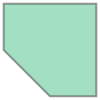

In [108]:
Polygon(list(example_1_pipe_network))

In [109]:
example_1_pipe_network

[(1, 2), (1, 3), (2, 3), (3, 3), (3, 2), (3, 1), (2, 1)]

In [110]:
example_1_start

(1, 1)